<a href="https://colab.research.google.com/github/ShreyaJaiswal1604/Airline-Passenger-Satisfaction-System/blob/main/notebooks/AI_Generated_Arthritis_Image_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG16
from tensorflow.keras.callbacks import EarlyStopping
# import mlflow
# from mlflow.entities import ViewType
# from mlflow.tracking import MlflowClient

In [ ]:
!git clone https://github.com/ShreyaJaiswal1604/Arthritis_Image_Classification

fatal: destination path 'Arthritis_Image_Classification' already exists and is not an empty directory.


In [ ]:
# Define data directories
base_dir = "./Arthritis_Image_Classification/dataset/Original_Knee_Osteoarthritis_Dataset"
#ai_dir = "./Arthritis_Image_Classification/dataset/AI_generated_Knee_Osteoarthritis_Dataset"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

ai_test_dir = os.path.join(base_dir, 'ai_test')
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


ai_test_generator = datagen.flow_from_directory(
    ai_test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2459 images belonging to 2 classes.
Found 355 images belonging to 2 classes.
Found 690 images belonging to 2 classes.
Found 354 images belonging to 2 classes.


In [ ]:
# Function to create, train, and evaluate a model
def train_model(base_model, model_name):
    #mlflow.tensorflow.autolog()

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Add the base model
    model.add(base_model)

    # Global average pooling layer
    model.add(tf.keras.layers.GlobalAveragePooling2D())

    # Dense layer with ReLU activation
    model.add(tf.keras.layers.Dense(256, activation='relu'))

    # Dropout layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.5))

    # Output layer with sigmoid activation for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    # with mlflow.start_run() as run:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=100,  # Increase the number of epochs
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=[early_stopping]  # Add early stopping callback
    )

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    # print("AI Test Accuracy:", ai_test_accuracy)
    # mlflow.log_metric("Test Accuracy", test_accuracy)

    # Evaluate the model on the AI-generated test data
    ai_test_loss, ai_test_accuracy = model.evaluate(ai_test_generator)
    # print("AI Test Accuracy:", ai_test_accuracy)

    print(f"Original {test_accuracy} vs AI {ai_test_accuracy}")

    # Log model artifacts
    # mlflow.tensorflow.log_model(model, "model")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return model, history

Epoch 1/100
76/76 [==============================] - 100s 623ms/step - loss: 0.1560 - accuracy: 0.9477 - val_loss: 3.6581 - val_accuracy: 0.9233
Epoch 2/100
76/76 [==============================] - 48s 628ms/step - loss: 0.0614 - accuracy: 0.9769 - val_loss: 0.4408 - val_accuracy: 0.9290
Epoch 3/100
76/76 [==============================] - 47s 612ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.2184 - val_accuracy: 0.9347
Epoch 4/100
76/76 [==============================] - 46s 607ms/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 0.2801 - val_accuracy: 0.9631
Epoch 5/100
76/76 [==============================] - 45s 585ms/step - loss: 0.0404 - accuracy: 0.9889 - val_loss: 0.4320 - val_accuracy: 0.9290
Epoch 6/100
76/76 [==============================] - 46s 610ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0979 - val_accuracy: 0.9744
Epoch 7/100
76/76 [==============================] - 45s 594ms/step - loss: 0.0313 - accuracy: 0.9918 - val_loss: 0.1054 - val_accuracy

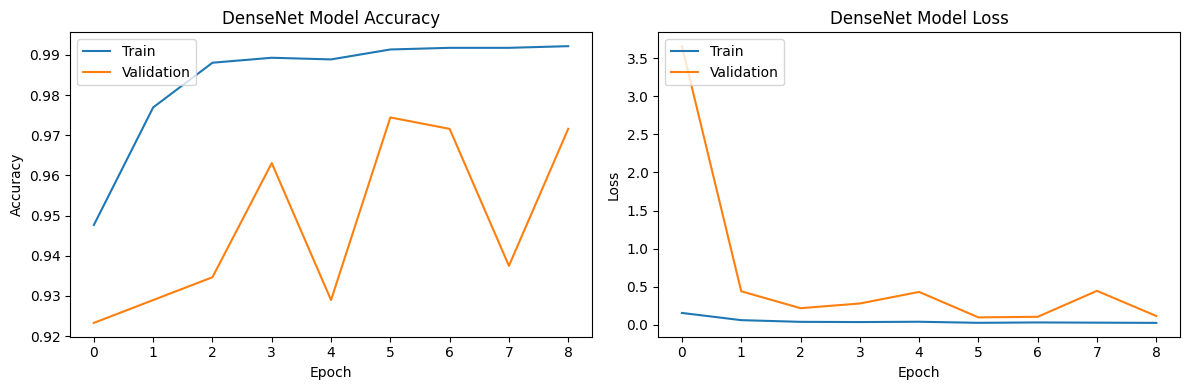

In [ ]:
# Train DenseNet model
densenet_model, densenet_history = train_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), 'DenseNet')


12/12 [==============================] - 6s 354ms/step


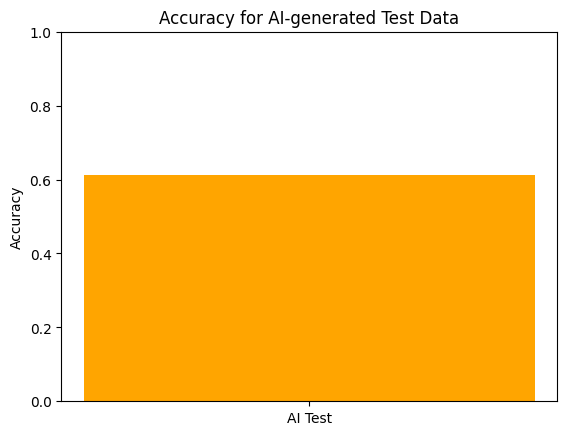

In [ ]:
# Make predictions on AI-generated test data
ai_test_predictions = densenet_model.predict(ai_test_generator)
ai_test_predictions = (ai_test_predictions > 0.5).astype('int32')  # Convert probabilities to binary predictions

# Calculate accuracy
ai_test_accuracy = np.mean(ai_test_predictions == ai_test_generator.labels)

# Plot the accuracy graph
plt.bar(['AI Test'], [ai_test_accuracy], color='orange')
plt.title('Accuracy for AI-generated Test Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()
